## Одна компонента

In [170]:
import random

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

In [2]:
# создадим 10 случайных наблюдений, где y линейно зависит от x
x_1 = np.arange(1,11)
y = 2 * x_1 + np.random.randn(10)*2
X = pd.DataFrame({'x':x_1, 'y':y})
X.head(3)

,x,y
0,1,-0.061139
1,2,3.218663
2,3,4.294068


In [3]:
# создадим вектор со средними значениями по осям x и y
# средние значения пригодятся для преобразования компонент в матрицу исходных значений
mean_val_vect = (X['x'].mean(), X['y'].mean())
mean_val_vect

(5.5, 9.87934944074884)

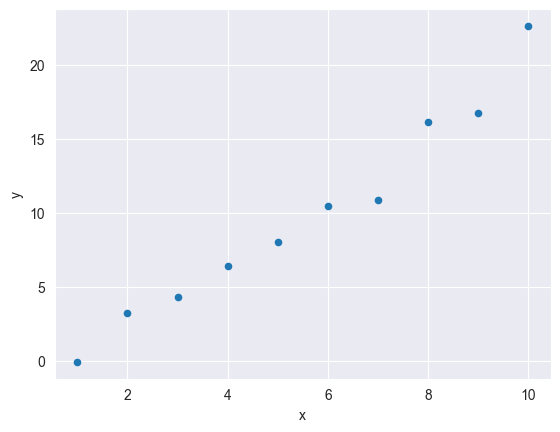

In [4]:
X.plot(kind='scatter', x='x', y='y')
plt.show()

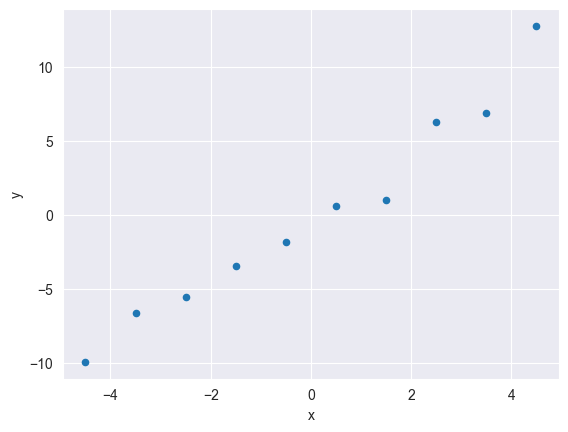

In [5]:
# нормализуем значения со средним равным 0, оставив первоначальную дисперсию
Z = pd.DataFrame()
Z['x'] = X['x'] - X['x'].mean()
Z['y'] = X['y'] - X['y'].mean()
Z.plot(kind='scatter', x='x', y='y')
plt.show()

In [6]:
# сделаем преобразование в более подходящий формат
Z = Z.to_numpy()
Z_T = Z.T
Z_T

array([[-4.5       , -3.5       , -2.5       , -1.5       , -0.5       ,
         0.5       ,  1.5       ,  2.5       ,  3.5       ,  4.5       ],
       [-9.94048875, -6.66068681, -5.5852817 , -3.48125062, -1.81257067,
         0.57576052,  0.98677207,  6.27152377,  6.89365722, 12.75256496]])

In [7]:
# найдем матричное произведение матриц Z и Z транспонированная
ZtZ = (Z.T.dot(Z))
# и число степеней свободы
df = len(x_1) - 1
ZtZ

array([[ 82.5       , 187.09715907],
       [187.09715907, 440.56560782]])

In [8]:
# найдем ковариационную матрицу
cov_matrix = ZtZ / df
var_sum = cov_matrix[0,0] + cov_matrix[1,1]
cov_matrix

array([[ 9.16666667, 20.78857323],
       [20.78857323, 48.9517342 ]])

In [9]:
print("Variance of X: ", cov_matrix[0,0])
print("Variance of Y: ", cov_matrix[1,1])
print("Covariance X and Y: ", cov_matrix[0,1])

Variance of X:  9.166666666666666
Variance of Y:  48.95173420187243
Covariance X and Y:  20.788573230538162


In [10]:
# готовый метод numpy cov()
np.cov(Z_T)

array([[ 9.16666667, 20.78857323],
       [20.78857323, 48.9517342 ]])

In [11]:
# найдем собственные значения и собственную матрицу для ковариационной матрицы
eigenvalues, eigenvector = np.linalg.eig(cov_matrix)
print('eigenvalues: ', eigenvalues)
print('eigenvector: ', eigenvector)

eigenvalues:  [ 0.28633689 57.83206398]
eigenvector:  [[-0.91960981 -0.39283304]
 [ 0.39283304 -0.91960981]]


In [12]:
# используем второй вектор так, как второе собственное значение больше первого
vecs = -eigenvector[:, 1]
X_reduced = vecs.dot(Z.T)
X_reduced[:3]

array([-10.90911965,  -7.50014857,  -6.11836244])

In [13]:
# восстановим случайный элемент
n = 9 # номер элемента случайной величины
X_restored = vecs.dot(X_reduced[n]) + mean_val_vect
print('Restored: ', X_restored)
print('Original: ', list(X.loc[n]))

Restored:  [10.80133391 22.2896057 ]
Original:  [10.0, 22.6319143972007]


In [14]:
# восстановим матрицу первоначальных значений
X_restored = X_reduced.reshape(len(X_reduced), 1).dot(vecs.reshape(1, len(vecs))) + mean_val_vect

In [15]:
# сравним и найдем разницу
total = pd.concat([X, pd.DataFrame(X_restored)], axis=1)
total['diff_x'] = (total['x'] - total[0]) ** 2
total['diff_y'] = (total['y'] - total[1]) ** 2
total.loc['Total'] = np.sqrt(total.sum())
total.head(5)

,x,y,0,1,diff_x,diff_y
0,1.0,-0.061139,1.214537,-0.152784,0.046026,0.008399
1,2.0,3.218663,2.553694,2.982139,0.306577,0.055943
2,3.0,4.294068,3.096505,4.252843,0.009313,0.001699
3,4.0,6.398099,4.010911,6.393438,0.000119,0.000022
4,5.0,8.066779,4.768044,8.165864,0.053803,0.009818


In [16]:
# инициируем готовый метод sklearn, с одной компонентой
pca = PCA(n_components=1)

In [17]:
X_sklearn_reduced = pca.fit_transform(X)

In [18]:
# сравним аналитическое и sklearn решения
compare = pd.DataFrame()
compare['Manual'] = X_reduced
compare['Sklearn'] = X_sklearn_reduced
compare.head(5)

,Manual,Sklearn
0,-10.909120,-10.909120
1,-7.500149,-7.500149
2,-6.118362,-6.118362
3,-3.790642,-3.790642
4,-1.863274,-1.863274


In [19]:
# сравним ключевые характеристики
print('Mean vector: ', pca.mean_, mean_val_vect)
print('Projection: ', pca.components_, vecs)
print('Explained variance: ', pca.explained_variance_, eigenvalues[1])
print('Explained variance ratio: ', pca.explained_variance_ratio_, eigenvalues[1] / var_sum)

Mean vector:  [5.5        9.87934944] (5.5, 9.87934944074884)
Projection:  [[0.39283304 0.91960981]] [0.39283304 0.91960981]
Explained variance:  [57.83206398] 57.832063980615935
Explained variance ratio:  [0.99507321] 0.9950732146162995


## Несколько компонент

In [514]:
np.random.seed()
# количество признаков X
n = 7
# количество наблюдений
N = 500
start = random.randint(0, 10)
stop = random.randint(30, 70)
# инициализируем математическое ожидание n случайных величин
mu = np.random.randint(start, stop, size=n)
# создадим ковариационную матрицу
cov = np.random.randint(start/5, stop/4, size=n)
C = np.dot(cov.reshape(n, 1), cov.reshape(1, n))
# пошумим
for x in np.nditer(C, op_flags = ['readwrite']):
   x[...] = x + random.uniform(0.,20.)

D_half = np.diag(np.diag(C)**(1.3))
C = C + D_half
# создадим матрицу признаков
X = np.dot(np.random.randn(N, n) + mu, C)

In [517]:
X_df = pd.DataFrame(X)

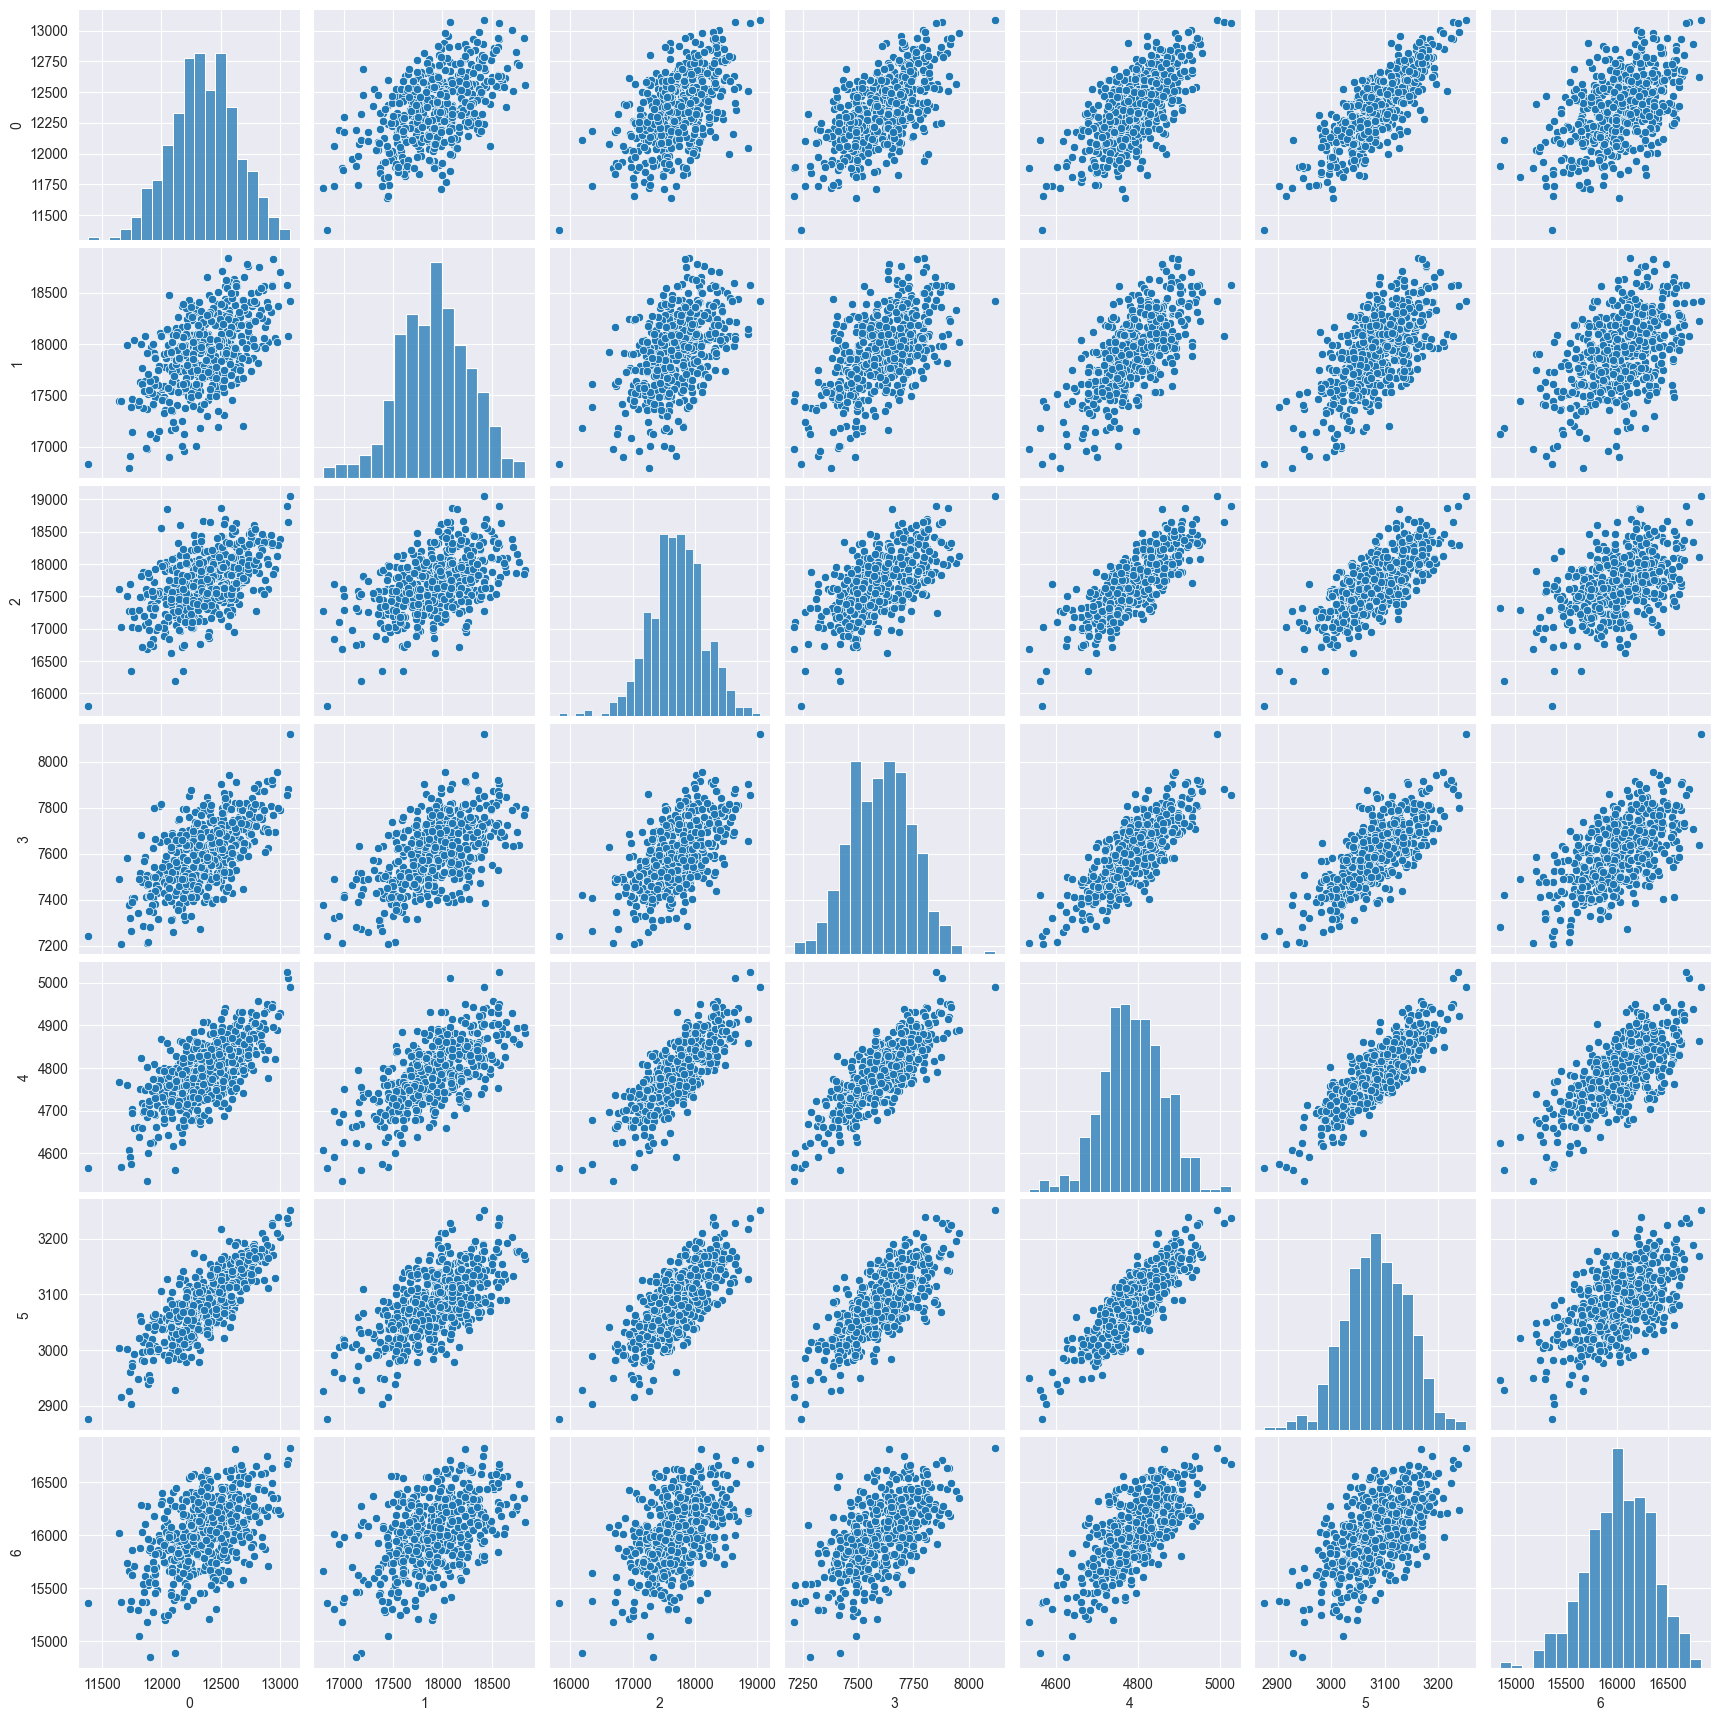

In [518]:
sns_plot = sns.pairplot(X_df)

In [519]:
# инициируем вектор со средними значениями
mu_X = [X[:,i].mean() for i in range(n)]

In [520]:
# отцентруем исходные значения
for i in range(n):
    X[:, i] = X[:, i] - mu_X[i]

In [521]:
# средние значения отцентрованого вектора
mu_X_сentred = [X[:,i].mean() for i in range(n)]

In [522]:
# найдем ковариационную матрицу
ddof = N - 1
cov_matrix = np.dot(X.T, X) / ddof
pd.DataFrame(cov_matrix)

,0,1,2,3,4,5,6
0,78270.259745,56768.929394,65886.875796,24694.935220,14409.314397,13607.840763,46892.172122
1,56768.929394,132709.454451,81093.996556,30276.867002,18373.071247,14252.806020,58384.664061
2,65886.875796,81093.996556,197935.410193,39517.388120,26666.181825,19957.255353,69788.634477
3,24694.935220,30276.867002,39517.388120,20272.298891,8616.364219,6486.335831,27584.708467
4,14409.314397,18373.071247,26666.181825,8616.364219,5606.159618,3826.481576,17895.615479
5,13607.840763,14252.806020,19957.255353,6486.335831,3826.481576,3525.246711,11929.703974
6,46892.172122,58384.664061,69788.634477,27584.708467,17895.615479,11929.703974,108412.584921


In [577]:
# выполним проверку
pd.DataFrame(np.cov(X.T))

,0,1,2,3,4,5,6
0,78270.259745,56768.929394,65886.875796,24694.935220,14409.314397,13607.840763,46892.172122
1,56768.929394,132709.454451,81093.996556,30276.867002,18373.071247,14252.806020,58384.664061
2,65886.875796,81093.996556,197935.410193,39517.388120,26666.181825,19957.255353,69788.634477
3,24694.935220,30276.867002,39517.388120,20272.298891,8616.364219,6486.335831,27584.708467
4,14409.314397,18373.071247,26666.181825,8616.364219,5606.159618,3826.481576,17895.615479
5,13607.840763,14252.806020,19957.255353,6486.335831,3826.481576,3525.246711,11929.703974
6,46892.172122,58384.664061,69788.634477,27584.708467,17895.615479,11929.703974,108412.584921


In [524]:
# найдем собственные значения и вектор
eigenvalues, eigenvector = np.linalg.eig(cov_matrix)

In [578]:
pd.Series(eigenvalues)

0    353565.421212
1     83835.032744
2     60865.835415
3     38987.143030
4      8345.931027
5       434.321044
6       697.730057
dtype: float64

In [485]:
# используем вектора 0, 1, 2

In [586]:
pd.DataFrame(eigenvector)

,0,1,2,3,4,5,6
0,0.351230,0.181962,0.017878,-0.901300,-0.147846,0.070020,-0.064071
1,0.478274,0.561699,-0.597969,0.302679,-0.074568,0.003697,-0.031519
2,0.656381,-0.728562,-0.077313,0.129595,-0.100559,0.009186,-0.073432
3,0.185273,0.035593,0.037511,-0.065034,0.964184,0.011523,-0.170254
4,0.116322,0.000203,0.032232,-0.003070,0.126382,0.440739,0.880453
5,0.088943,0.003660,0.000712,-0.074872,0.063726,-0.894637,0.426654
6,0.401607,0.345399,0.796047,0.263448,-0.113068,-0.015491,-0.057377


In [580]:
W = np.vstack((eigenvector[:, 0], eigenvector[:, 1], eigenvector[:, 2]))
pd.DataFrame(W)

,0,1,2,3,4,5,6
0,0.351230,0.478274,0.656381,0.185273,0.116322,0.088943,0.401607
1,0.181962,0.561699,-0.728562,0.035593,0.000203,0.003660,0.345399
2,0.017878,-0.597969,-0.077313,0.037511,0.032232,0.000712,0.796047


In [563]:
Z = np.dot(X, W.T)

In [564]:
pca_1 = PCA(n_components=3)
Z_sk = pca_1.fit_transform(X)

In [585]:
# сравним аналитическое и sklearn решения
compare_Z = np.hstack((Z, Z_sk))
pd.DataFrame(compare_Z[:20])

,0,1,2,3,4,5
0,-645.693627,159.425466,-155.719328,645.693627,159.425466,-155.719328
1,-1002.262119,133.743423,85.627717,1002.262119,133.743423,85.627717
2,-430.869581,-20.625148,98.289696,430.869581,-20.625148,98.289696
3,-378.837078,-570.843395,63.724736,378.837078,-570.843395,63.724736
4,103.176496,-299.872343,-8.709758,-103.176496,-299.872343,-8.709758
5,-275.810829,165.851535,-405.211316,275.810829,165.851535,-405.211316
6,-216.816424,175.945265,64.034809,216.816424,175.945265,64.034809
7,510.786817,56.517421,-183.355880,-510.786817,56.517421,-183.355880
8,-630.433692,-43.750285,-72.348243,630.433692,-43.750285,-72.348243
9,-94.965283,-130.012701,-1.562618,94.965283,-130.012701,-1.562618


In [566]:
# сравним ключевые характеристики

In [584]:
# Mean vector
pd.DataFrame([pca_1.mean_, mu_X_сentred], index=['pca.mean_', 'mu_X_сentred'])

,0,1,2,3,4,5,6
pca.mean_,1.400622e-12,1.578883e-12,-4.583853e-13,8.167262e-13,4.165486e-13,1.073204e-13,-4.656613e-13
mu_X_сentred,1.400622e-12,1.578883e-12,-4.583853e-13,8.167262e-13,4.165486e-13,1.073204e-13,-4.656613e-13


In [568]:
# Projection

In [582]:
pd.DataFrame(pca_1.components_)

,0,1,2,3,4,5,6
0,-0.351230,-0.478274,-0.656381,-0.185273,-0.116322,-0.088943,-0.401607
1,0.181962,0.561699,-0.728562,0.035593,0.000203,0.003660,0.345399
2,0.017878,-0.597969,-0.077313,0.037511,0.032232,0.000712,0.796047


In [583]:
pd.DataFrame(W)

,0,1,2,3,4,5,6
0,0.351230,0.478274,0.656381,0.185273,0.116322,0.088943,0.401607
1,0.181962,0.561699,-0.728562,0.035593,0.000203,0.003660,0.345399
2,0.017878,-0.597969,-0.077313,0.037511,0.032232,0.000712,0.796047


In [571]:
# Explained variance

In [572]:
sum(pca_1.explained_variance_)

498266.2893706008

In [573]:
eigenvalues[0] + eigenvalues[1] + eigenvalues[2]

498266.2893706011

In [574]:
# Explained variance ratio

In [575]:
sum(pca_1.explained_variance_ratio_)

0.9113547824937059

In [576]:
(eigenvalues[0] + eigenvalues[1] + eigenvalues[2]) / sum(np.diag(cov_matrix))

0.911354782493706